# Import Necessary Modules/Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.preprocessing import OrdinalEncoder

# Characteristic of the Dataset

In [2]:
df_raw = pd.read_csv('../input/covid19-indonesia/covid_19_indonesia_time_series_all.csv')
df_raw

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.00,1.00
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00


In [3]:
df_raw.columns

Index(['Date', 'Location ISO Code', 'Location', 'New Cases', 'New Deaths',
       'New Recovered', 'New Active Cases', 'Total Cases', 'Total Deaths',
       'Total Recovered', 'Total Active Cases', 'Location Level',
       'City or Regency', 'Province', 'Country', 'Continent', 'Island',
       'Time Zone', 'Special Status', 'Total Regencies', 'Total Cities',
       'Total Districts', 'Total Urban Villages', 'Total Rural Villages',
       'Area (km2)', 'Population', 'Population Density', 'Longitude',
       'Latitude', 'New Cases per Million', 'Total Cases per Million',
       'New Deaths per Million', 'Total Deaths per Million',
       'Total Deaths per 100rb', 'Case Fatality Rate', 'Case Recovered Rate',
       'Growth Factor of New Cases', 'Growth Factor of New Deaths'],
      dtype='object')

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

# Data Cleaning

In [5]:
# Delete null and unnecessary columns
df_raw = df_raw.dropna(axis=1, how='all')
df_raw = df_raw.drop(labels=['Location ISO Code',
                             'Location Level',
                             'Special Status',
                             'Country',
                             'Continent',
                             'Time Zone'
                            ], axis=1)

# Change value from string (percentage value) to float
df_raw['Case Fatality Rate'] = df_raw['Case Fatality Rate'].str.rstrip('%').astype('float')/100
df_raw['Case Recovered Rate'] = df_raw['Case Recovered Rate'].str.rstrip('%').astype('float')/100

# Check again the dataset
df_raw

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,DKI Jakarta,2,0,0,2,39,20,75,-56,...,-6.204699,0.18,3.60,0.0,1.84,0.18,0.5128,1.9231,NaN,NaN
1,3/2/2020,DKI Jakarta,2,0,0,2,41,20,75,-54,...,-6.204699,0.18,3.78,0.0,1.84,0.18,0.4878,1.8293,1.00,1.00
2,3/2/2020,Indonesia,2,0,0,2,2,0,0,2,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.0000,0.0000,NaN,NaN
3,3/2/2020,Riau,1,0,0,1,1,0,1,0,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.0000,1.0000,NaN,NaN
4,3/3/2020,DKI Jakarta,2,0,0,2,43,20,75,-52,...,-6.204699,0.18,3.96,0.0,1.84,0.18,0.4651,1.7442,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,9/15/2022,Sulawesi Utara,37,0,0,37,52770,1213,50997,560,...,1.259638,14.01,19974.38,0.0,459.14,45.91,0.0230,0.9664,2.85,1.00
31818,9/15/2022,Sumatera Barat,13,0,3,10,104640,2371,102066,203,...,-0.850253,2.36,18959.11,0.0,429.59,42.96,0.0227,0.9754,6.50,1.00
31819,9/15/2022,Sumatera Selatan,16,0,1,15,82198,3376,78510,312,...,-3.216212,1.95,10002.74,0.0,410.83,41.08,0.0411,0.9551,3.20,1.00
31820,9/15/2022,Sumatera Utara,50,0,5,45,158866,3288,154924,654,...,2.191894,3.36,10680.15,0.0,221.04,22.10,0.0207,0.9752,1.92,1.00


# Find The Correlations Between Each Variable/Column

In [6]:
df_corr = df_raw.copy()

# Change datetime to int scalar value
df_corr['Date'] = pd.to_datetime(df_corr['Date']).astype(np.int64)

# Exclued df_corr['Location'] == Indonesia from the dataset
i = df_corr[df_corr['Location'] == 'Indonesia'].index
df_corr = df_corr.drop(i)

# Replace null value with 0
df_corr = df_corr.fillna(0)

df_corr

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  after removing the cwd from sys.path.


,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,1583020800000000000,DKI Jakarta,2,0,0,2,39,20,75,-56,...,-6.204699,0.18,3.60,0.00,1.84,0.18,0.5128,1.9231,0.00,0.0
1,1583107200000000000,DKI Jakarta,2,0,0,2,41,20,75,-54,...,-6.204699,0.18,3.78,0.00,1.84,0.18,0.4878,1.8293,1.00,1.0
3,1583107200000000000,Riau,1,0,0,1,1,0,1,0,...,0.511648,0.16,0.16,0.00,0.00,0.00,0.0000,1.0000,0.00,0.0
4,1583193600000000000,DKI Jakarta,2,0,0,2,43,20,75,-52,...,-6.204699,0.18,3.96,0.00,1.84,0.18,0.4651,1.7442,1.00,1.0
6,1583193600000000000,Jawa Barat,1,1,0,0,1,1,60,-60,...,-6.920432,0.02,0.02,0.02,0.02,0.00,1.0000,60.0000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31816,1663200000000000000,Sulawesi Tenggara,2,0,0,2,25693,569,25090,34,...,-4.124689,0.76,9748.96,0.00,215.90,21.59,0.0221,0.9765,0.00,1.0
31817,1663200000000000000,Sulawesi Utara,37,0,0,37,52770,1213,50997,560,...,1.259638,14.01,19974.38,0.00,459.14,45.91,0.0230,0.9664,2.85,1.0
31818,1663200000000000000,Sumatera Barat,13,0,3,10,104640,2371,102066,203,...,-0.850253,2.36,18959.11,0.00,429.59,42.96,0.0227,0.9754,6.50,1.0
31819,1663200000000000000,Sumatera Selatan,16,0,1,15,82198,3376,78510,312,...,-3.216212,1.95,10002.74,0.00,410.83,41.08,0.0411,0.9551,3.20,1.0


In [7]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30893 entries, 0 to 31820
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         30893 non-null  int64  
 1   Location                     30893 non-null  object 
 2   New Cases                    30893 non-null  int64  
 3   New Deaths                   30893 non-null  int64  
 4   New Recovered                30893 non-null  int64  
 5   New Active Cases             30893 non-null  int64  
 6   Total Cases                  30893 non-null  int64  
 7   Total Deaths                 30893 non-null  int64  
 8   Total Recovered              30893 non-null  int64  
 9   Total Active Cases           30893 non-null  int64  
 10  Province                     30893 non-null  object 
 11  Island                       30893 non-null  object 
 12  Total Regencies              30893 non-null  int64  
 13  Total Cities    

In [8]:
# Encode the categorical data
ord_enc = OrdinalEncoder()
df_corr['Location'] = ord_enc.fit_transform(df_corr[['Location']]).astype(int)
df_corr['Province'] = ord_enc.fit_transform(df_corr[['Province']]).astype(int)
df_corr['Island'] = ord_enc.fit_transform(df_corr[['Island']]).astype(int)

df_corr

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,1583020800000000000,4,2,0,0,2,39,20,75,-56,...,-6.204699,0.18,3.60,0.00,1.84,0.18,0.5128,1.9231,0.00,0.0
1,1583107200000000000,4,2,0,0,2,41,20,75,-54,...,-6.204699,0.18,3.78,0.00,1.84,0.18,0.4878,1.8293,1.00,1.0
3,1583107200000000000,25,1,0,0,1,1,0,1,0,...,0.511648,0.16,0.16,0.00,0.00,0.00,0.0000,1.0000,0.00,0.0
4,1583193600000000000,4,2,0,0,2,43,20,75,-52,...,-6.204699,0.18,3.96,0.00,1.84,0.18,0.4651,1.7442,1.00,1.0
6,1583193600000000000,8,1,1,0,0,1,1,60,-60,...,-6.920432,0.02,0.02,0.02,0.02,0.00,1.0000,60.0000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31816,1663200000000000000,29,2,0,0,2,25693,569,25090,34,...,-4.124689,0.76,9748.96,0.00,215.90,21.59,0.0221,0.9765,0.00,1.0
31817,1663200000000000000,30,37,0,0,37,52770,1213,50997,560,...,1.259638,14.01,19974.38,0.00,459.14,45.91,0.0230,0.9664,2.85,1.0
31818,1663200000000000000,31,13,0,3,10,104640,2371,102066,203,...,-0.850253,2.36,18959.11,0.00,429.59,42.96,0.0227,0.9754,6.50,1.0
31819,1663200000000000000,32,16,0,1,15,82198,3376,78510,312,...,-3.216212,1.95,10002.74,0.00,410.83,41.08,0.0411,0.9551,3.20,1.0


In [9]:
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30893 entries, 0 to 31820
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         30893 non-null  int64  
 1   Location                     30893 non-null  int64  
 2   New Cases                    30893 non-null  int64  
 3   New Deaths                   30893 non-null  int64  
 4   New Recovered                30893 non-null  int64  
 5   New Active Cases             30893 non-null  int64  
 6   Total Cases                  30893 non-null  int64  
 7   Total Deaths                 30893 non-null  int64  
 8   Total Recovered              30893 non-null  int64  
 9   Total Active Cases           30893 non-null  int64  
 10  Province                     30893 non-null  int64  
 11  Island                       30893 non-null  int64  
 12  Total Regencies              30893 non-null  int64  
 13  Total Cities    

<AxesSubplot:>

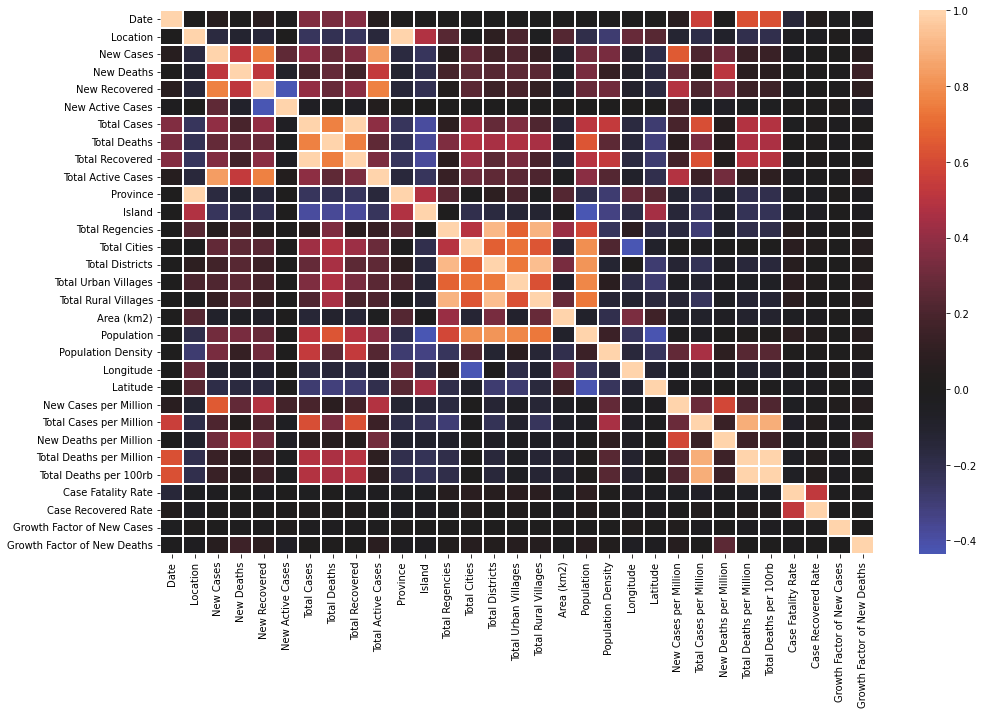

In [10]:
# plot the dataframe to a heatmap to see the correlation
fig, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(df_corr.corr(), linewidths=0.1, center=0)

# Data Visualization

In [11]:
# try to run this code if the plot doesn't show up
import plotly.offline as po
po.init_notebook_mode(connected=True)

## Total Active Cases All Over Indonesia

Active cases refer to the current number of infected people.

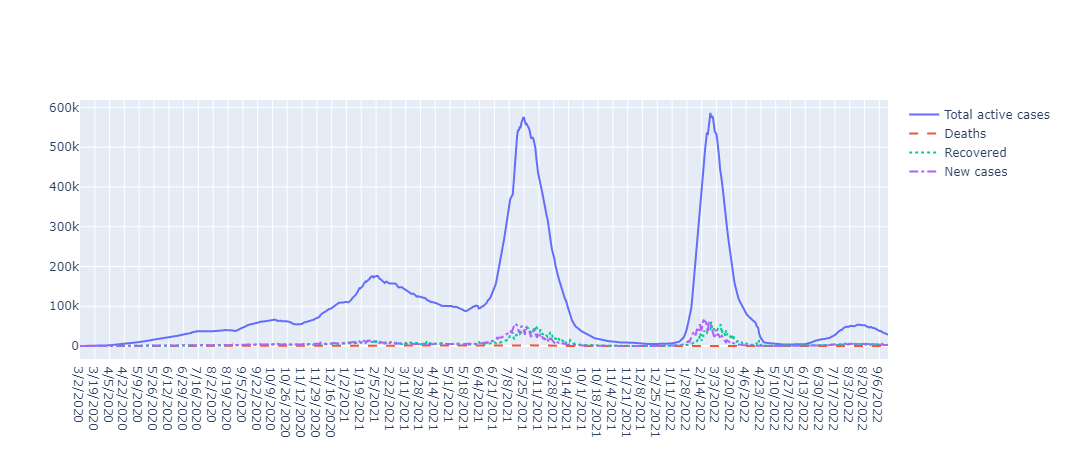

In [12]:
df_ind = df_raw[df_raw['Location'] == 'Indonesia']

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_ind['Date'], 
                         y=df_ind['Total Active Cases'],
                         name='Total active cases'                         
                        ))

fig.add_trace(go.Scatter(x=df_ind['Date'],
                         y=df_ind['New Deaths'],
                         name='Deaths',
                         line=dict(dash='dash')
                        ))

fig.add_trace(go.Scatter(x=df_ind['Date'],
                         y=df_ind['New Recovered'],
                         name='Recovered',
                         line=dict(dash='dot')
                        ))

fig.add_trace(go.Scatter(x=df_ind['Date'],
                         y=df_ind['New Cases'],
                         name='New cases',
                         line=dict(dash='dashdot')
                        ))

fig.show()

## Total Active Cases Grouped By Each Province

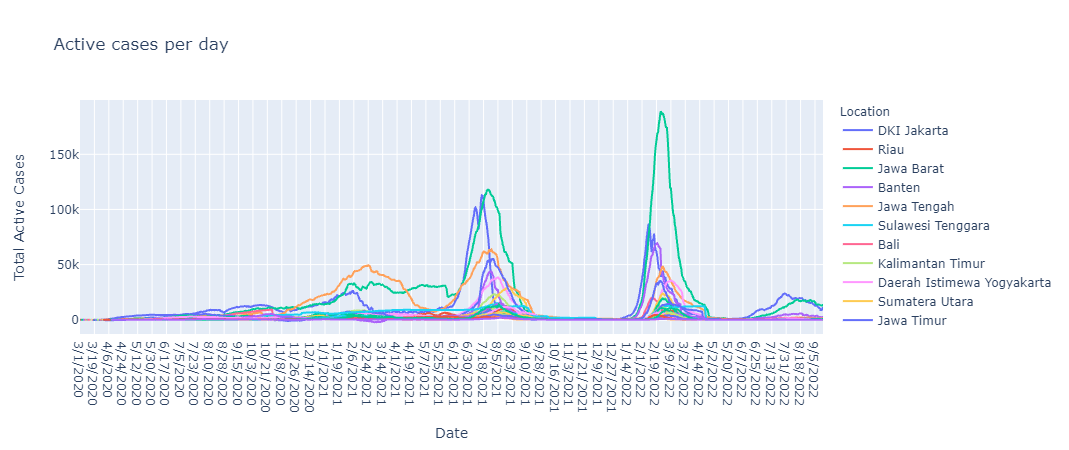

In [13]:
df_prov = df_raw
i = df_prov[df_prov['Location'] == 'Indonesia'].index
df_prov = df_prov.drop(i)

fig = px.line(df_prov, x='Date', y='Total Active Cases', color='Location', title='Active cases per day')
fig.show()

## Total Cases Grouped By Province

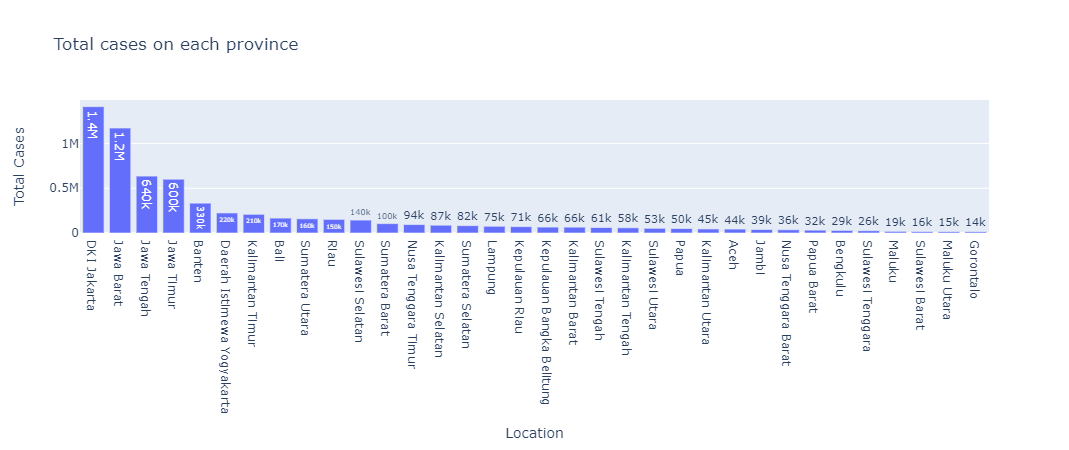

In [14]:
df_prov2 = pd.DataFrame(columns = ['Location', 'Total Cases'])
df_prov2['Location'] = df_raw['Location'].unique()
i = df_prov2[df_prov2['Location'] == 'Indonesia'].index
df_prov2 = df_prov2.drop(i)

for land in df_prov2['Location']:
    i = df_prov2[df_prov2['Location']==land].index.values
    df_prov2['Total Cases'][i] = df_raw[df_raw['Location']==land]['Total Cases'].max()

df_prov2 = df_prov2.dropna()
df_prov2 = df_prov2.sort_values('Total Cases', ascending=False)
df_prov2 = df_prov2.reset_index(drop=True)

fig1 = px.bar(df_prov2, y='Total Cases', x='Location', title='Total cases on each province', text_auto='.2s')
fig1.show()

## Total Cases Grouped by Island

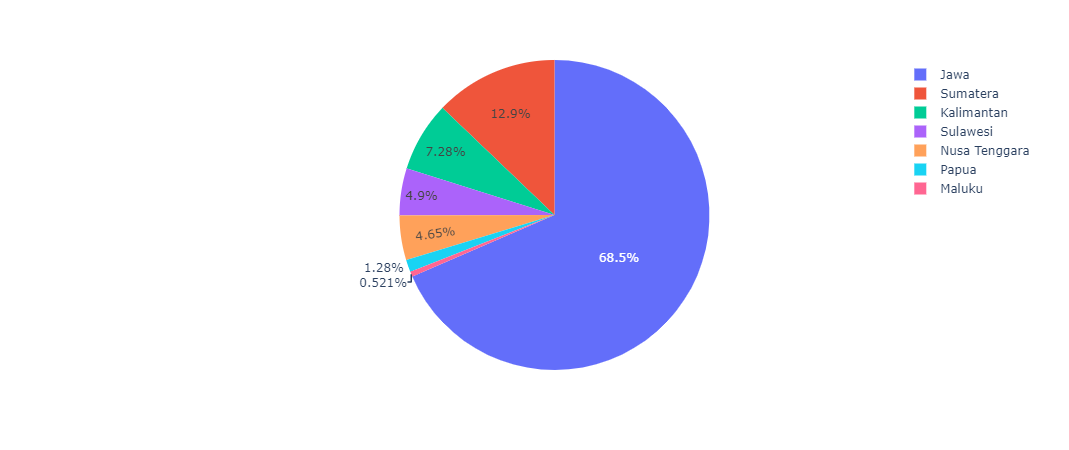

In [15]:
df_land = df_prov2.copy()
df_land['Island'] = ''

for prov in df_land['Location']:
    i = df_land[df_land['Location']==prov].index.values
    df_land['Island'][i] = df_raw[df_raw['Location']==prov]['Island'].unique()
    
df_island = pd.DataFrame(columns=['Island', 'Total Cases'])
df_island['Island'] = df_land['Island'].unique()

for land in df_island['Island']:
    i = df_island[df_island['Island']==land].index.values
    df_island['Total Cases'][i] = df_land[df_land['Island']==land]['Total Cases'].sum()

    
fig = px.pie(df_island, values='Total Cases', names='Island')
fig.show()

## Total Cases and Population Density

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



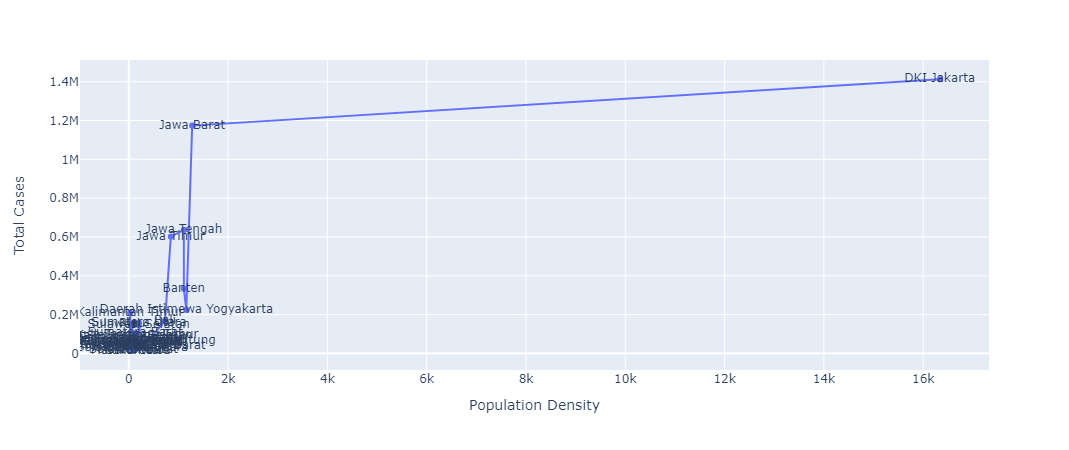

In [16]:
df_pd = pd.DataFrame(columns = ['Location', 'Population Density', 'Total Cases'])
df_pd['Population Density'] = df_raw['Population Density'].unique()

for pop_den in df_pd['Population Density']:
    i = df_pd[df_pd['Population Density'] == pop_den].index.values
    df_pd['Total Cases'][i] = df_raw[df_raw['Population Density'] == pop_den]['Total Cases'].max()
    df_pd['Location'][i] = df_raw[df_raw['Population Density'] == pop_den]['Location'].unique()
    
# drop Indonesia's Population Density
for pop_den in df_pd['Population Density']:
    i = df_pd[df_pd['Population Density'] == pop_den].index.values
    for loc in df_raw[df_raw['Population Density'] == pop_den]['Location']:
        if loc == 'Indonesia':
            df_pd = df_pd.drop(labels=i, axis=0)
            break

df_pd = df_pd.sort_values('Population Density')
df_pd = df_pd.reset_index(drop=True)

fig = px.line(df_pd, x='Population Density', y='Total Cases', text='Location')
fig.show()